In [33]:
import numpy as np
import networkx as nx
import scipy.linalg as la
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from algebraic_connectivity_directed.algebraic_connectivity_directed import *

https://github.com/statsmodels/statsmodels/issues/3039


Usage
After installation, run from algebraic_connectivity_directed.algebraic_connectivity_directed import *
There are 3 main functions:
Function algebraic_connectivity_directed: algebraic_connectivity_directed(G) returns a, b, M where a is the algebraic connectivity of the digraph G. The graph G is a networkx DiGraph object. The definitions of a, b, M = Q'*(L+L')*Q/2 can be found in Ref. [2].
Function algebraic_connectivity_directed_variants: algebraic_connectivity_directed_variants(G,k) returns variations of algebraic connectivity of the digraph G. The graph G is a networkx DiGraph object. Setting k = 1, 2, 3, 4 returns a1, a2, a3, a4 as defined in Ref. [5].
Function compute_mu_directed: compute_mu_directed(G) returns mu(G) defined as the supremum of numbers μ such that U(L-μ*I)+(L'-μ*I)U is positive semidefinite for some symmetric zero row sums real matrix U with nonpositive off-diagonal elements where L is the Laplacian matrix of graph G (see Ref. [1]).
compute_mu_directed accepts multiple arguments. If the input are multiple graphs G1, G2, G3, ... with Li the Laplacian matrix of Gi, and all Gi have the same number of nodes, then compute_mu_directed(G1, G2, G3, ...) returns the supremum of μ such that there exist some symmetric zero row sums real matrix U with nonpositive off-diagonal elements where for all i, U(Li-μ*I)+(Li '-μ*I)U is positive semidefinite. This is useful in analyzing synchronization of networked systems where systems are coupled via multiple networks. See Ref. [6]. The graph G is a networkx DiGraph object.
a1 is the same as the value returned by algebraic_connectivity_directed(G)[0] (see Ref. [2]).
a2 is the same as ã as described in Ref. [3].
a3 is described in the proof of Theorem 21 in Ref. [3].
a4 is equal to η as described in Ref. [4].
If the reversal of the graph does not contain a spanning directed tree, then a2 ≤ 0.
If G is strongly connected then a3 ≥ a2 > 0.
a4 > 0 if and only if the reversal of the graph contains a spanning directed tree.
Examples
Cycle graph
from algebraic_connectivity_directed.algebraic_connectivity_directed import *
import networkx as nx
import numpy as np
G = nx.cycle_graph(10,create_using=nx.DiGraph)
print(algebraic_connectivity_directed(G)[0:2])

>> (0.19098300562505233, 2.0)
print(algebraic_connectivity_directed_variants(G,2))
>> 0.1909830056250514
Directed graphs of 5 nodes
A1 = np.array([[0,0,1,0,0],[0,0,0,1,1],[1,0,0,1,1],[1,1,0,0,1],[0,0,0,1,0]])
G1 = nx.from_numpy_matrix(A1,create_using=nx.DiGraph)
print(compute_mu_directed(G1))
>>> 0.8521009635833089
print(algebraic_connectivity_directed_variants(G1, 4))
>>> 0.6606088707716056
A2 = np.array([[0,1,0,0,1],[0,0,0,1,0],[0,0,0,1,1],[1,0,0,0,0],[1,0,1,1,0]])
G2 = nx.from_numpy_matrix(A2,create_using=nx.DiGraph)
A3 = np.array([[0,1,0,0,0],[1,0,1,0,0],[0,1,0,0,0],[0,0,1,0,0],[1,1,1,0,0]])
G3 = nx.from_numpy_matrix(A3,create_using=nx.DiGraph)
print(compute_mu_directed(G1,G2,G3))
>>> 0.8381214637786955

In [52]:
# cycle graph
from algebraic_connectivity_directed.algebraic_connectivity_directed import *
import networkx as nx
import numpy as np

G = nx.cycle_graph( 10, create_using=nx.DiGraph )
print( algebraic_connectivity_directed( G )[ 0 ] )
print( algebraic_connectivity_directed_variants( G, 2 ) )
print( algebraic_connectivity_directed_variants( G, 3 ) )
print( algebraic_connectivity_directed_variants( G, 4 ) )

A1 = np.array( [ [ 0, 0, 1, 0, 0 ], [ 0, 0, 0, 1, 1 ], [ 1, 0, 0, 1, 1 ], [ 1, 1, 0, 0, 1 ], [ 0, 0, 0, 1, 0 ] ] )
G = nx.DiGraph( A1 )
for e in G.edges():
    G[ e[ 0 ] ][ e[ 1 ] ][ 'weight' ] = np.random.rand()
print( G.edges( data=True ) )
print( algebraic_connectivity_directed( G )[ 0 ] )
print( algebraic_connectivity_directed_variants( G, 1 ) )
print( algebraic_connectivity_directed_variants( G, 2 ) )
print( algebraic_connectivity_directed_variants( G, 3 ) )
print( algebraic_connectivity_directed_variants( G, 4 ) )

0.19098300562505266
0.19098300562505244
0.19098300562505197
0.19098300562505238
[(0, 2, {'weight': 0.1509509486823596}), (1, 3, {'weight': 0.8213215047424277}), (1, 4, {'weight': 0.16843334696913626}), (2, 0, {'weight': 0.8530695194897494}), (2, 3, {'weight': 0.7597941285965768}), (2, 4, {'weight': 0.40827085090089865}), (3, 0, {'weight': 0.30394813770813256}), (3, 1, {'weight': 0.9386674586848119}), (3, 4, {'weight': 0.7367780933827351}), (4, 3, {'weight': 0.4998592139959812})]
0.14790996827469804
0.14790996827469804
0.0690673650682608
0.13144155473483463
1.283682922915193e-17


In [49]:
# Directed graphs of 5 nodes
A1 = np.array( [ [ 0, 0, 1, 0, 0 ], [ 0, 0, 0, 1, 1 ], [ 1, 0, 0, 1, 1 ], [ 1, 1, 0, 0, 1 ], [ 0, 0, 0, 1, 0 ] ] )
G1 = nx.from_numpy_matrix( A1, create_using=nx.DiGraph )
print( compute_mu_directed( G1 ) )

print( algebraic_connectivity_directed_variants( G1, 4 ) )

A2 = np.array( [ [ 0, 1, 0, 0, 1 ], [ 0, 0, 0, 1, 0 ], [ 0, 0, 0, 1, 1 ], [ 1, 0, 0, 0, 0 ], [ 1, 0, 1, 1, 0 ] ] )
G2 = nx.from_numpy_matrix( A2, create_using=nx.DiGraph )
A3 = np.array( [ [ 0, 1, 0, 0, 0 ], [ 1, 0, 1, 0, 0 ], [ 0, 1, 0, 0, 0 ], [ 0, 0, 1, 0, 0 ], [ 1, 1, 1, 0, 0 ] ] )
G3 = nx.from_numpy_matrix( A3, create_using=nx.DiGraph )
print( compute_mu_directed( G1, G2, G3 ) )

0.8521009635833086
0.6606088707716065
0.8411585820083546


In [36]:
def orthogonal_complement( x, normalize=True, threshold=1e-15 ):
    """Compute orthogonal complement of a matrix

    this works along axis zero, i.e. rank == column rank,
    or number of rows > column rank
    otherwise orthogonal complement is empty

    TODO possibly: use normalize='top' or 'bottom'

    """
    x = np.asarray( x )
    r, c = x.shape
    if r < c:
        import warnings
        warnings.warn( 'fewer rows than columns', UserWarning )

    # we assume svd is ordered by decreasing singular value, o.w. need sort
    s, v, d = np.linalg.svd( x )
    rank = (v > threshold).sum()

    oc = s[ :, rank: ]

    if normalize:
        k_oc = oc.shape[ 1 ]
        oc = oc.dot( np.linalg.inv( oc[ :k_oc, : ] ) )
    return oc



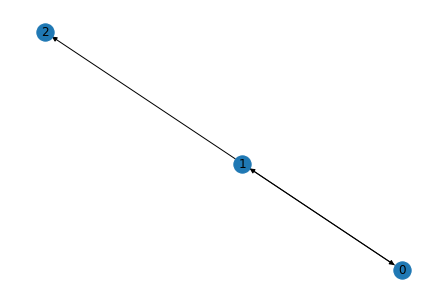

In [37]:
g_directed = nx.DiGraph()
g_directed.add_edge( 0, 1 )
g_directed.add_edge( 1, 0 )
g_directed.add_edge( 1, 2 )

nx.draw( g_directed, with_labels=True )
plt.show()



In [38]:
A_directed = nx.adjacency_matrix( g_directed )
A_symmetric = 1 / 2 * (A_directed + A_directed.T)


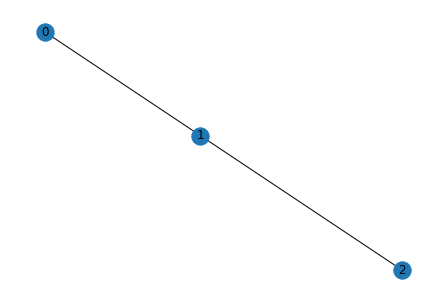

In [39]:

g_undirected = nx.from_numpy_array( A_symmetric )

nx.draw( g_undirected, with_labels=True )
plt.show()

In [40]:
L_directed = nx.directed_laplacian_matrix( g_directed )
L_undirected = nx.linalg.laplacian_matrix( g_undirected ).todense()

D = g_directed.out_degree()
D = np.diag( [ d[ 1 ] for d in D ] )
print( 'D', D )
# L_directed_2 =
print( L_directed )
print( L_undirected )
# print( L_undirected_2 )

print( la.eig( L_directed )[ 0 ][ 2 ] )
print( la.eig( L_undirected )[ 0 ][ 2 ] )
print( nx.linalg.algebraic_connectivity( g_undirected ) )

D [[1 0 0]
 [0 2 0]
 [0 0 0]]
[[ 0.98333333 -0.70302245 -0.175     ]
 [-0.70302245  0.98333333 -0.42761159]
 [-0.175      -0.42761159  0.66666667]]
[[ 1.  -1.   0. ]
 [-1.   1.5 -0.5]
 [ 0.  -0.5  0.5]]
(0.9125963856228956+0j)
(0.6339745962155612+0j)
0.6339745962155615


Compute orthogonal complement in order to compute directed algebraic connectivity as defined in https://www-tandfonline-com.proxy-ub.rug.nl/doi/pdf/10.1080/03081080500054810?needAccess=true
The orthogonal complement of vector(s) is the set of all vectors orthogonal to given ones

In [41]:
xxx = np.array( [ [ 1, 0, 1, 0, 2 ], [ 0, 1, 1, 1, 0 ], [ 1, 1, 1, 1, 1 ] ] ).T
ocn = np.round( orthogonal_complement( xxx, normalize=True ), 2 )
print( 'xxx\n', xxx )
print( 'xxx^{\perp} normalised\n', ocn )
print( 'xxx^{\perp}\n', orthogonal_complement( xxx, normalize=False ) )
print( 'ocn^T \dot xxx\n', ocn.T.dot( xxx ) )

xxx
 [[1 0 1]
 [0 1 1]
 [1 1 1]
 [0 1 1]
 [2 0 1]]
xxx^{\perp} normalised
 [[ 1. -0.]
 [ 0.  1.]
 [ 1.  0.]
 [-1. -1.]
 [-1. -0.]]
xxx^{\perp}
 [[-0.06635725 -0.5303876 ]
 [-0.66845821  0.35297619]
 [-0.06635725 -0.5303876 ]
 [ 0.73481546  0.17741141]
 [ 0.06635725  0.5303876 ]]
ocn^T \dot xxx
 [[0. 0. 0.]
 [0. 0. 0.]]


In [42]:
n = L_directed.shape[ 0 ]
e = np.array( [ [ 1 ] ] * n )
# check that e is a right eigenvector of L
L_undirected @ e

matrix([[0.],
        [0.],
        [0.]])